# Import Libraries

In [ ]:
from google.colab import files
import warnings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
colors = sns.color_palette('rocket')[0:20]
cmap = LinearSegmentedColormap.from_list("", colors)

# Import Dataset

In [ ]:
file = files.upload()  #upload file

Saving df_clean_ver1.xlsx to df_clean_ver1.xlsx


In [ ]:
df = pd.read_excel("df_clean_ver1.xlsx")

In [ ]:
df.head()

,Unnamed: 0,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,"Sid, Arthik, Reha, Vinit",negativereason_confidence,airline,name,retweet_count,tweet_coord,tweet_created,tweet_location,user_timezone,remaining_sentence,cleaned_tweets,sentiment_score
0,0,570306133677760000,neutral,1.0000,NaN,neutral,NaN,Virgin America,cairdin,0,NaN,2015-02-24 11:35:52,NaN,Eastern Time (US & Canada),What @dhepburn said.,dhepburn said,0.0000
1,1,570301130888121984,positive,0.3486,NaN,negative,0.0000,Virgin America,jnardino,0,NaN,2015-02-24 11:15:59,NaN,Pacific Time (US & Canada),plus you've added commercials to the experienc...,plus youve added commercial experience tacky,0.0000
2,2,570301083672812992,neutral,0.6837,NaN,neutral,NaN,Virgin America,yvonnalynn,0,NaN,2015-02-24 11:15:48,Lets Play,Central Time (US & Canada),I didn't today... Must mean I need to take ano...,didnt today must mean need take another trip,0.0000
3,3,570301031407624000,negative,1.0000,Bad Flight,negative,0.7033,Virgin America,jnardino,0,NaN,2015-02-24 11:15:36,NaN,Pacific Time (US & Canada),"it's really aggressive to blast obnoxious ""ent...",really aggressive blast obnoxious entertainmen...,-0.3306
4,4,570300817074462016,negative,1.0000,Can't Tell,negative,1.0000,Virgin America,jnardino,0,NaN,2015-02-24 11:14:45,NaN,Pacific Time (US & Canada),and it's a really big bad thing about it,really big bad thing,-0.5829


# Minor Cleaning of Dataset

In [ ]:
df = df.rename(columns={"Sid, Arthik, Reha, Vinit": "sentiment"})
df["sentiment"] = df["sentiment"].str.strip()
df.head()

,Unnamed: 0,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,sentiment,negativereason_confidence,airline,name,retweet_count,tweet_coord,tweet_created,tweet_location,user_timezone,remaining_sentence,cleaned_tweets,sentiment_score
0,0,570306133677760000,neutral,1.0000,NaN,neutral,NaN,Virgin America,cairdin,0,NaN,2015-02-24 11:35:52,NaN,Eastern Time (US & Canada),What @dhepburn said.,dhepburn said,0.0000
1,1,570301130888121984,positive,0.3486,NaN,negative,0.0000,Virgin America,jnardino,0,NaN,2015-02-24 11:15:59,NaN,Pacific Time (US & Canada),plus you've added commercials to the experienc...,plus youve added commercial experience tacky,0.0000
2,2,570301083672812992,neutral,0.6837,NaN,neutral,NaN,Virgin America,yvonnalynn,0,NaN,2015-02-24 11:15:48,Lets Play,Central Time (US & Canada),I didn't today... Must mean I need to take ano...,didnt today must mean need take another trip,0.0000
3,3,570301031407624000,negative,1.0000,Bad Flight,negative,0.7033,Virgin America,jnardino,0,NaN,2015-02-24 11:15:36,NaN,Pacific Time (US & Canada),"it's really aggressive to blast obnoxious ""ent...",really aggressive blast obnoxious entertainmen...,-0.3306
4,4,570300817074462016,negative,1.0000,Can't Tell,negative,1.0000,Virgin America,jnardino,0,NaN,2015-02-24 11:14:45,NaN,Pacific Time (US & Canada),and it's a really big bad thing about it,really big bad thing,-0.5829


In [ ]:
df["sentiment"].unique()

array(['neutral', 'negative', 'positive', nan], dtype=object)

In [ ]:
df_cleaned = df[['sentiment','cleaned_tweets']]
df_cleaned.shape

(14640, 2)

In [ ]:
df_cleaned.dropna(subset = ['sentiment'], inplace=True)

df_cleaned.shape

(4235, 2)

In [ ]:
df_cleaned.dropna(subset = ['cleaned_tweets'], inplace=True)

df_cleaned.shape

(4232, 2)

# Model 1: SVM & Cleaned Tweets

In [ ]:
train, test = train_test_split(df_cleaned, test_size=0.3, random_state=1)
X_train = train['cleaned_tweets'].values
X_test = test['cleaned_tweets'].values
y_train = train['sentiment']
y_test = test['sentiment']

In [ ]:
vectorizer = CountVectorizer()
features_train = vectorizer.fit_transform(X_train)
features_test = vectorizer.transform(X_test)

In [ ]:
svm = SVC(kernel='linear')
svm.fit(features_train, y_train)

SVC(kernel='linear')

In [ ]:
predictions = svm.predict(features_test)
new_text = ["worst ever airlines in the world", "i would definitely come back here thanks a lot", "what is the number"]
new_features = vectorizer.transform(new_text)
new_predictions = svm.predict(new_features)
print(new_predictions)

['negative' 'positive' 'neutral']


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.81      0.82      0.82       753
     neutral       0.54      0.54      0.54       287
    positive       0.61      0.59      0.60       230

    accuracy                           0.71      1270
   macro avg       0.65      0.65      0.65      1270
weighted avg       0.71      0.71      0.71      1270



In [ ]:
print("Accuracy:",accuracy_score(y_test, predictions))
acc1 = accuracy_score(y_test, predictions)

Accuracy: 0.7141732283464567


In [ ]:
print(f1_score(y_test, predictions, average=None))
f11 = f1_score(y_test, predictions, average=None)

[0.81535407 0.53819444 0.6004415 ]


# Model 2: SVM with TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
features_train = vectorizer.fit_transform(X_train)
features_test = vectorizer.transform(X_test)

In [ ]:
svm = SVC(kernel='linear')
svm.fit(features_train, y_train)

SVC(kernel='linear')

In [ ]:
predictions = svm.predict(features_test)
new_text = ["worst ever airlines in the world", "i loved the service a lot", "what is the number"]
new_features = vectorizer.transform(new_text)
new_predictions = svm.predict(new_features)
print(new_predictions)

['negative' 'negative' 'neutral']


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.76      0.89      0.82       753
     neutral       0.57      0.41      0.48       287
    positive       0.66      0.52      0.58       230

    accuracy                           0.72      1270
   macro avg       0.67      0.61      0.63      1270
weighted avg       0.70      0.72      0.70      1270



In [ ]:
print("Accuracy:",accuracy_score(y_test, predictions))
acc2 = accuracy_score(y_test, predictions)

Accuracy: 0.7173228346456693


In [ ]:
print(f1_score(y_test, predictions, average=None))
f12 = f1_score(y_test, predictions, average=None)

[0.82324159 0.47870183 0.58252427]


# Model 3: SVM with GridSearchCV

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
def tokenize(text):
    tknzr = TweetTokenizer()
    return tknzr.tokenize(text)

vectorizer = CountVectorizer(analyzer = 'word',
                              tokenizer = tokenize,
                              lowercase = True,
                              ngram_range=(1, 1))

In [ ]:
from sklearn.pipeline import make_pipeline

kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

pipeline_svm = make_pipeline(vectorizer,
                            SVC(probability=True, kernel="linear", class_weight="balanced"))

In [ ]:
params_grid = {'svc__C': [0.01,0.1,1,10], 'svc__gamma': [1,0.1,0.01,0.001],'svc__kernel': ['rbf', 'poly', 'sigmoid']}

grid_svm = GridSearchCV(pipeline_svm,params_grid,refit=True,verbose=2)

In [ ]:
grid_svm.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........svc__C=0.01, svc__gamma=1, svc__kernel=rbf; total time=   5.9s
[CV] END .........svc__C=0.01, svc__gamma=1, svc__kernel=rbf; total time=   5.2s
[CV] END .........svc__C=0.01, svc__gamma=1, svc__kernel=rbf; total time=   5.9s
[CV] END .........svc__C=0.01, svc__gamma=1, svc__kernel=rbf; total time=   5.2s
[CV] END .........svc__C=0.01, svc__gamma=1, svc__kernel=rbf; total time=   5.9s
[CV] END ........svc__C=0.01, svc__gamma=1, svc__kernel=poly; total time=   5.1s
[CV] END ........svc__C=0.01, svc__gamma=1, svc__kernel=poly; total time=   5.6s
[CV] END ........svc__C=0.01, svc__gamma=1, svc__kernel=poly; total time=   5.5s
[CV] END ........svc__C=0.01, svc__gamma=1, svc__kernel=poly; total time=   5.2s
[CV] END ........svc__C=0.01, svc__gamma=1, svc__kernel=poly; total time=   5.8s
[CV] END .....svc__C=0.01, svc__gamma=1, svc__kernel=sigmoid; total time=   5.0s
[CV] END .....svc__C=0.01, svc__gamma=1, svc__k

GridSearchCV(estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(tokenizer=<function tokenize at 0x7f056cb6b010>)),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            kernel='linear',
                                            probability=True))]),
             param_grid={'svc__C': [0.01, 0.1, 1, 10],
                         'svc__gamma': [1, 0.1, 0.01, 0.001],
                         'svc__kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [ ]:
grid_svm.score(X_test, y_test)

0.7173228346456693

In [ ]:
grid_svm.best_params_

{'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}

In [ ]:
grid_svm.best_score_

0.7032348115400392

In [ ]:
grid_predictions = grid_svm.predict(X_test)

In [ ]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

    negative       0.79      0.84      0.82       753
     neutral       0.53      0.52      0.53       287
    positive       0.66      0.55      0.60       230

    accuracy                           0.72      1270
   macro avg       0.66      0.64      0.65      1270
weighted avg       0.71      0.72      0.71      1270



In [ ]:
grid_svm.best_estimator_

Pipeline(steps=[('countvectorizer',
                 CountVectorizer(tokenizer=<function tokenize at 0x7f056cb6b010>)),
                ('svc',
                 SVC(C=10, class_weight='balanced', gamma=0.1,
                     probability=True))])

In [ ]:
print(confusion_matrix(y_test,grid_predictions))


[[636  90  27]
 [101 149  37]
 [ 64  40 126]]


##### With Best Parameters

In [ ]:
train, test = train_test_split(df_cleaned, test_size=0.3, random_state=1)
X_train = train['cleaned_tweets'].values
X_test = test['cleaned_tweets'].values
y_train = train['sentiment']
y_test = test['sentiment']

In [ ]:
def tokenize(text):
    tknzr = TweetTokenizer()
    return tknzr.tokenize(text)

vectorizer = CountVectorizer(analyzer = 'word',
                              tokenizer = tokenize,
                              lowercase = True,
                              ngram_range=(1, 1))
features_train = vectorizer.fit_transform(X_train)
features_test = vectorizer.transform(X_test)

In [ ]:
svm = SVC(C=10, class_weight='balanced', gamma=0.1, kernel='rbf',probability=True)

In [ ]:
svm.fit(features_train, y_train)

SVC(C=10, class_weight='balanced', gamma=0.1, probability=True)

In [ ]:
predictions = svm.predict(features_test)
new_text = ["worst ever airlines in the world", "i love it here", "what is the number"]
new_features = vectorizer.transform(new_text)
new_predictions = svm.predict(new_features)
print(new_predictions)

['negative' 'neutral' 'neutral']


In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.79      0.84      0.82       753
     neutral       0.53      0.52      0.53       287
    positive       0.66      0.55      0.60       230

    accuracy                           0.72      1270
   macro avg       0.66      0.64      0.65      1270
weighted avg       0.71      0.72      0.71      1270



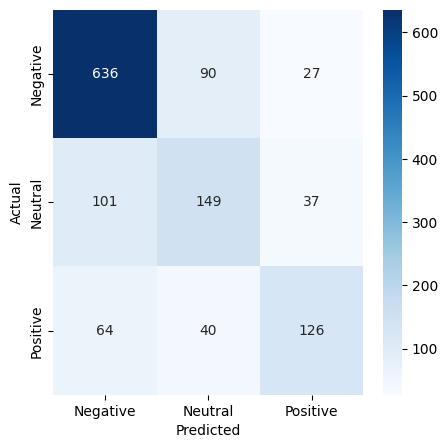

In [ ]:
cm = confusion_matrix(y_test, predictions)
labels=['Negative', 'Neutral','Positive']
plt.figure(figsize=(5,5))
sns.heatmap(cm,  xticklabels=labels, yticklabels=labels, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print("Accuracy:",accuracy_score(y_test, predictions))
acc3 = accuracy_score(y_test, predictions)

Accuracy: 0.7173228346456693


In [ ]:
print(f1_score(y_test, predictions, average=None))
f13 = f1_score(y_test, predictions, average=None)

[0.81853282 0.52650177 0.6       ]


Text(0.5, 0, 'Model')

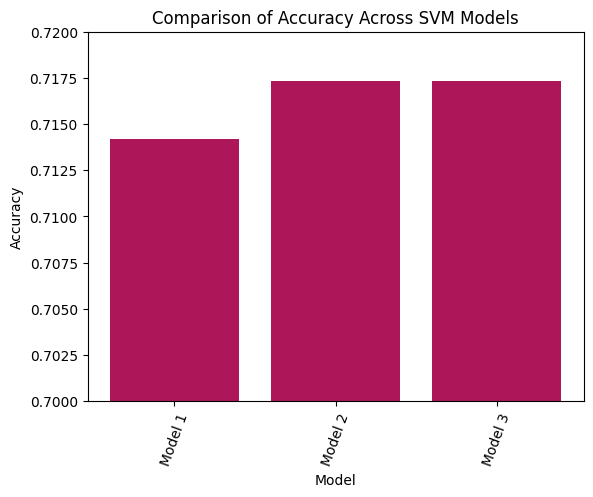

In [ ]:
from matplotlib import colors as mcolors

cls_name = ['Model 1', 'Model 2', 'Model 3']
accuracy = [acc1, acc2, acc3]
plt.bar(cls_name, accuracy, color = sns.color_palette('rocket')[2])
plt.xticks(rotation=70)
plt.ylim(0.7, 0.72)
plt.title("Comparison of Accuracy Across SVM Models")
plt.ylabel("Accuracy")
plt.xlabel("Model")

Text(0.5, 0, 'Model')

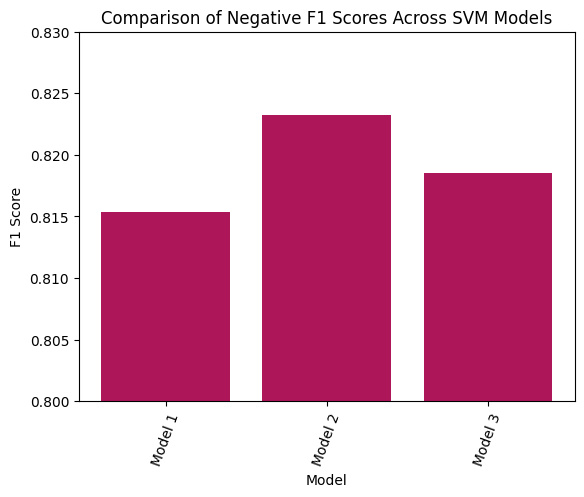

In [ ]:
cls_name = ['Model 1', 'Model 2', 'Model 3']
f1_score = [f11[0], f12[0], f13[0]]
plt.bar(cls_name, f1_score, color = sns.color_palette('rocket')[2])
plt.xticks(rotation=70)
plt.ylim(0.8, 0.83)
plt.title("Comparison of Negative F1 Scores Across SVM Models")
plt.ylabel("F1 Score")
plt.xlabel("Model")